# 3.5 图像分类数据集（Fashion-MNIST）

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from IPython import display
import time
import sys
sys.path.append("..") # 为了导入上层目录的d2lzh_pytorch
# import d2lzh_pytorch as d2l
from d2l import torch as d2l
print(torch.__version__)
print(torchvision.__version__)

1.11.0+cu115
0.12.0+cu115


## 3.5.1 获取数据集

In [22]:
mnist_train = torchvision.datasets.FashionMNIST(root='/Users/rainbow/workingLabs/Dive-into-DL-PyTorch/data/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='/Users/rainbow/workingLabs/Dive-into-DL-PyTorch/data/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

In [23]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [24]:
feature, label = mnist_train[0]
print(feature.shape, feature.dtype)  # Channel x Height X Width
print(label)

torch.Size([1, 28, 28]) torch.float32
9


In [25]:
mnist_PIL = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True)
PIL_feature, label = mnist_PIL[0]
print(PIL_feature)

<PIL.Image.Image image mode=L size=28x28 at 0x20F09A92310>


In [26]:
# 本函数已保存在d2lzh包中方便以后使用
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [27]:
# 本函数已保存在d2lzh包中方便以后使用
def show_fashion_mnist(images, labels):
    #use_svg_display
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

In [28]:
def show_singe_image(image, label):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    fig, ax = plt.subplots()
    ax.imshow(image.view((28, 28)).numpy())  # 假设输入的图像是单通道的灰度图像
    ax.set_title(text_labels[label])
    # 设置刻度不可见
    # ax.axes.get_xaxis().set_visible(False)
    # ax.axes.get_yaxis().set_visible(False)

    # 显示图像
    plt.show()

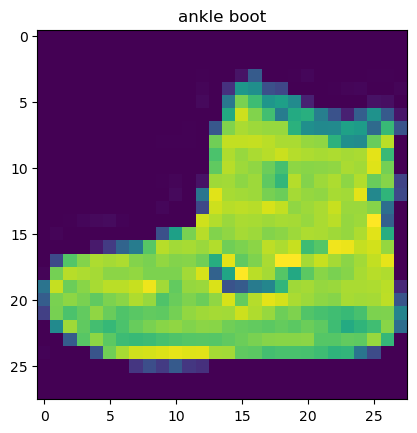

In [29]:
show_singe_image(mnist_train[0][0], mnist_train[0][1])

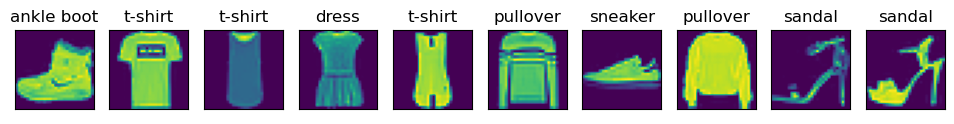

In [30]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
# display.set_matplotlib_formats('svg')
show_fashion_mnist(X, get_fashion_mnist_labels(y))

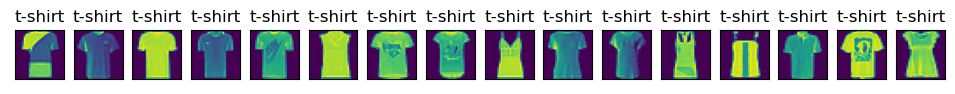

In [31]:
X, y = [], []
for i in range(500, 650):
    pic = mnist_train[i][0]
    label = mnist_train[i][1]
    if (label == 0):
        X.append(pic)
        y.append(label)
show_fashion_mnist(X, get_fashion_mnist_labels(y))

## 3.5.2 读取小批量

In [32]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [33]:
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

3.98 sec


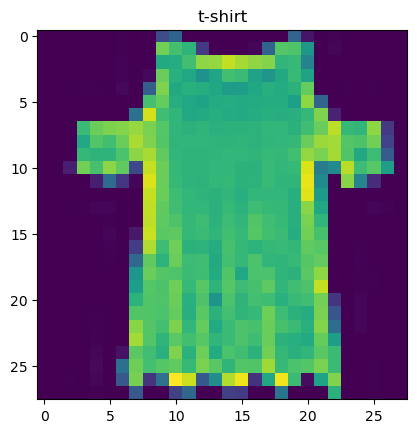

In [34]:
data_iter = iter(train_iter)
X, y = next(data_iter)
X.size(), y.size()
show_singe_image(X[1], y[1])

In [35]:
import torch